# A : nodige modules

In [174]:
# standaard in python
import os 
import datetime
import sys
import json

In [175]:
# te installeren packages en modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from scipy.stats import norm

In [176]:
# eigen packages modules
current_working_directory = os.getcwd()                                    
parent_working_directory = os.path.dirname(current_working_directory)      
scripts_directory = os.path.join(parent_working_directory, 'scripts')      
sys.path.append(scripts_directory)                                         
# sys.path.remove(scripts_directory)
# print(sys.path)

import comeinhandy as cih
import simulatie as sim

# B : functies om herhaling te vermijden

In [177]:
#  zie cih = 'comeinhandy' module

# C : opladen van de gegevens

In [178]:
# C.1 opladen JSON file met MSR waarden (min_sust_rate = minimu sustainable rate)
min_sust_rate_locatie = "../data/raw/productiemodel/data_productie/master_data.json"
df_msr_gegevens = cih.laad_msr_gegevens_in_dataframe(min_sust_rate_locatie)
# df_msr_gegevens

In [179]:
# C.2 bepaal waar de dagelijk productie sets (per fabriek) zich bevinden op schijf
dagelijkse_productie_locatie = "../data/raw/productiemodel/data_productie/daily_production/"

In [180]:

# C.2.1. Laad dagelijks productie voor BRU in zijn dataframe
factory = 'BRU'
dagelijkse_productie_BRU = cih.laad_dagelijkse_productie_in_dataframe(
                                factory, 
                                os.path.join(dagelijkse_productie_locatie, factory))
# dagelijkse_productie_BRU

# C.2.2 voeg MSR waarden toe op het BRU dagelijkse productie dataframe
dagelijkse_productie_BRU = dagelijkse_productie_BRU.merge(
                                        df_msr_gegevens, on='factory', how='left')
dagelijkse_productie_BRU

# C.2.3 verwijder records waar onderhoud werd gepland, zie opgave beschrijving 5, bullet 1 en dixit Tim in de klas
dagelijkse_productie_BRU = dagelijkse_productie_BRU[dagelijkse_productie_BRU['maintenance'] == 'No']
# dagelijkse_productie_BRU

In [181]:
# C.3.1. Laad dagelijks productie voor STO in zijn dataframe
factory = 'STO'
dagelijkse_productie_STO = cih.laad_dagelijkse_productie_in_dataframe(
                                factory, 
                                os.path.join(dagelijkse_productie_locatie, factory))
# dagelijkse_productie_STO

# C.2.2 voeg MSR waarden toe op het STO dagelijkse productie dataframe
dagelijkse_productie_STO = dagelijkse_productie_STO.merge(
                                        df_msr_gegevens, on='factory', how='left')
# dagelijkse_productie_STO

# C.3.3 verwijder records waar onderhoud werd gepland, zie opgave beschrijving 5, bullet 1 en dixit Tim in de klas
dagelijkse_productie_STO = dagelijkse_productie_STO[dagelijkse_productie_STO['maintenance'] == 'No']
# dagelijkse_productie_STO

In [182]:
# C.5.0 Breng alle gegevens te samen in een groot dataframe voor analyse
dagelijkse_productie_ALL = pd.concat(
                            [dagelijkse_productie_BRU, 
                             dagelijkse_productie_STO],
                               ignore_index=True)
#  save het voor analyse in een Excel sheet
dagelijkse_productie_ALL.to_excel("../data/interim/dagelijkse_productie_ALL.xlsx")
# dagelijkse_productie_ALL

In [183]:
dagelijkse_productie_ALL['production'].mean()
# dagelijkse_productie_ALL['production'].median()
# dagelijkse_productie_ALL.describe(include='all')

497.17352259559675

# D : minimale controle van het Dataframe

In [184]:
dagelijkse_productie_ALL

,DoW,hour,minute,date,maintenance,prod_loss,prod_loss_perc,production,factory,msr_description,msr_value
0,Monday,1,0,01-01-2018 00:00:00.0000,No,61,5,1183,BRU,BRU msr,1244
1,Tuesday,1,0,01-02-2018 00:00:00.0000,No,106,9,1138,BRU,BRU msr,1244
2,Wednesday,1,0,01-03-2018 00:00:00.0000,No,129,10,1115,BRU,BRU msr,1244
3,Thursday,1,0,01-04-2018 00:00:00.0000,No,278,22,966,BRU,BRU msr,1244
4,Friday,1,0,01-05-2018 00:00:00.0000,No,218,17,1026,BRU,BRU msr,1244
...,...,...,...,...,...,...,...,...,...,...,...
3447,Saturday,1,0,12-31-2022 00:00:00.0000,No,51,19,223,STO,STO msr,274
3448,Sunday,1,0,01-01-2023 00:00:00.0000,No,53,20,221,STO,STO msr,274
3449,Monday,1,0,01-02-2023 00:00:00.0000,No,61,22,213,STO,STO msr,274
3450,Tuesday,1,0,01-03-2023 00:00:00.0000,No,70,25,204,STO,STO msr,274


In [185]:
dagelijkse_productie_ALL.shape

(3452, 11)

In [186]:
dagelijkse_productie_ALL.columns

Index(['DoW', 'hour', 'minute', 'date', 'maintenance', 'prod_loss',
       'prod_loss_perc', 'production', 'factory', 'msr_description',
       'msr_value'],
      dtype='object')

In [187]:
dagelijkse_productie_ALL.index

RangeIndex(start=0, stop=3452, step=1)

In [188]:
dagelijkse_productie_ALL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3452 entries, 0 to 3451
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DoW              3452 non-null   object
 1   hour             3452 non-null   int64 
 2   minute           3452 non-null   int64 
 3   date             3452 non-null   object
 4   maintenance      3452 non-null   object
 5   prod_loss        3452 non-null   object
 6   prod_loss_perc   3452 non-null   object
 7   production       3452 non-null   object
 8   factory          3452 non-null   object
 9   msr_description  3452 non-null   object
 10  msr_value        3452 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 296.8+ KB


In [189]:
dagelijkse_productie_ALL.describe()
dagelijkse_productie_ALL.describe(include = "all") 

,DoW,hour,minute,date,maintenance,prod_loss,prod_loss_perc,production,factory,msr_description,msr_value
count,3452,3452.0,3452.0,3452,3452,3452.0,3452.0,3452.0,3452,3452,3452.000000
unique,7,NaN,NaN,1830,1,433.0,93.0,580.0,2,2,NaN
top,Monday,NaN,NaN,01-01-2018 00:00:00.0000,No,1244.0,100.0,0.0,BRU,BRU msr,NaN
freq,496,NaN,NaN,2,3452,308.0,434.0,434.0,1736,1736,NaN
mean,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,761.809965
std,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,485.062123
min,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.000000
25%,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.000000
50%,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1244.000000
75%,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1244.000000


In [190]:
cih.show_info_about_column(dagelijkse_productie_BRU, 'production')

----- None -- production -----------------------------------
df[col].describe(include='all') = count     1736
unique     387
top          0
freq       308
Name: production, dtype: int64 

----- None -- production -----------------------------------
df[col].nunique(dropna=True) = 387 
 
----- None -- production -----------------------------------
df[col].value_counts() = production
0       308
1011     13
1115     12
1005     11
1019     11
       ... 
869       1
886       1
874       1
418       1
876       1
Name: count, Length: 387, dtype: int64 
 
----- end of query --------------------------------------------------


In [191]:
cih.show_info_about_column(dagelijkse_productie_STO, 'production')

----- None -- production -----------------------------------
df[col].describe(include='all') = count     1716
unique     194
top          0
freq       126
Name: production, dtype: int64 

----- None -- production -----------------------------------
df[col].nunique(dropna=True) = 194 
 
----- None -- production -----------------------------------
df[col].value_counts() = production
0      126
202     55
198     51
203     50
209     50
      ... 
110      1
34       1
145      1
41       1
152      1
Name: count, Length: 194, dtype: int64 
 
----- end of query --------------------------------------------------


In [192]:
cih.show_info_about_column(dagelijkse_productie_ALL, 'production')

----- None -- production -----------------------------------
df[col].describe(include='all') = count     3452
unique     580
top          0
freq       434
Name: production, dtype: int64 

----- None -- production -----------------------------------
df[col].nunique(dropna=True) = 580 
 
----- None -- production -----------------------------------
df[col].value_counts() = production
0      434
202     55
198     51
203     50
209     50
      ... 
474      1
630      1
642      1
896      1
152      1
Name: count, Length: 580, dtype: int64 
 
----- end of query --------------------------------------------------


# E : permanente cleaning van de data

In [193]:
# dagelijkse_productie_STO.info()

# # columns_to_convert_to_int = ['prod_loss', 'production']
# # dagelijkse_productie_STO[columns_to_convert_to_int] = dagelijkse_productie_STO[columns_to_convert_to_int].astype(int) 
# # dagelijkse_productie_STO['prod_loss'] = dagelijkse_productie_STO['prod_loss'].astype(int) 
# # dagelijkse_productie_STO['production'] = dagelijkse_productie_STO['production'].astype(int) 
# dagelijkse_productie_STO['prod_loss'] = pd.to_numeric(dagelijkse_productie_STO['prod_loss'], errors='coerce')

# # columns_to_convert_to_float = ['prod_loss_perc']
# # dagelijkse_productie_STO[columns_to_convert_to_float] = dagelijkse_productie_STO[columns_to_convert_to_float].astype(float) 

# dagelijkse_productie_STO.info()

In [194]:
# C.3.1.b identificeer de 0 dagen productie lijnen
dagelijkse_productie_BRU_geen_productie = dagelijkse_productie_BRU[dagelijkse_productie_BRU['maintenance'] == 'No']
# dagelijkse_productie_BRU_maintenance_removed


# F : analyse van de mogelijke verdelingen

In [195]:
#  controle van de kolom productie voor de STO fabriek
missing_values = dagelijkse_productie_STO['production'].isnull().sum()
non_numeric_values = (dagelijkse_productie_STO['production'].apply(lambda x: isinstance(x, (int, float)))).sum()
print(f"Aantal ontbrekende waarden: {missing_values}")
print(f"Aantal niet-numerieke waarden: {non_numeric_values}")


Aantal ontbrekende waarden: 0
Aantal niet-numerieke waarden: 1716


Kans op STO productiedag zonder productie =  0.07342657342657342 


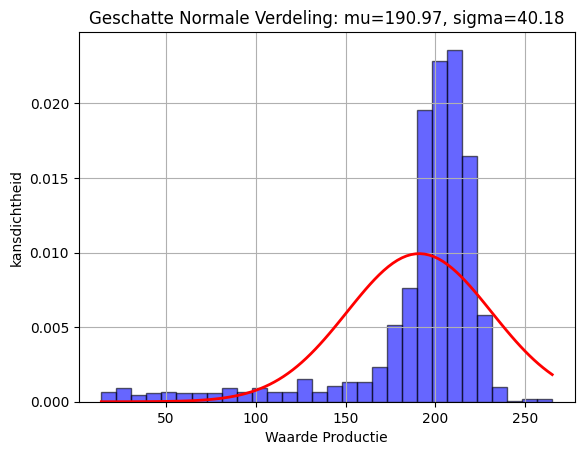

In [196]:
# fitting data voor STO fabriek
dagelijkse_productie_STO['production'] = dagelijkse_productie_STO['production'].apply(pd.to_numeric)

plotdata_STO_zonder_productie_df = dagelijkse_productie_STO[dagelijkse_productie_STO['production'] == 0]
plotdata_STO_zonder_productie_arr = plotdata_STO_zonder_productie_df['production'].to_numpy()
print(f"Kans op STO productiedag zonder productie =  {len(plotdata_STO_zonder_productie_arr) / len(dagelijkse_productie_STO['production'])} ")

plotdata_STO_met_productie_df = dagelijkse_productie_STO[dagelijkse_productie_STO['production'] != 0]
plotdata_STO_met_productie_arr = plotdata_STO_met_productie_df['production'].to_numpy()

mu_STO, sigma_STO = norm.fit(plotdata_STO_met_productie_arr)

# Maak een histogram van de gegevens
plt.hist(plotdata_STO_met_productie_arr, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')

# Maak een PDF (probability density function) op basis van de geschatte parameters
x = np.linspace(min(plotdata_STO_met_productie_arr), max(plotdata_STO_met_productie_arr), 100)
pdf_STO = norm.pdf(x, mu_STO, sigma_STO)

# Plot de PDF
plt.plot(x, pdf_STO, 'r', linewidth=2)
plt.title(f'Geschatte Normale Verdeling: mu={mu_STO:.2f}, sigma={sigma_STO:.2f}')
plt.xlabel('Waarde Productie')
plt.ylabel('kansdichtheid')
plt.grid(True)
plt.show()

In [197]:
#  controle van de kolom productie voor de BRU fabriek
missing_values = dagelijkse_productie_BRU['production'].isnull().sum()
non_numeric_values = (dagelijkse_productie_BRU['production'].apply(lambda x: isinstance(x, (int, float)))).sum()
print(f"Aantal ontbrekende waarden: {missing_values}")
print(f"Aantal niet-numerieke waarden: {non_numeric_values}")

Aantal ontbrekende waarden: 0
Aantal niet-numerieke waarden: 1736


In [198]:
plotdata_BRU = dagelijkse_productie_BRU['production'].to_numpy()
plotdata_BRU

array([1183, 1138, 1115, ..., 1063, 1046, 1073], dtype=object)

Kans op BRU productiedag zonder productie =  0.1774193548387097 


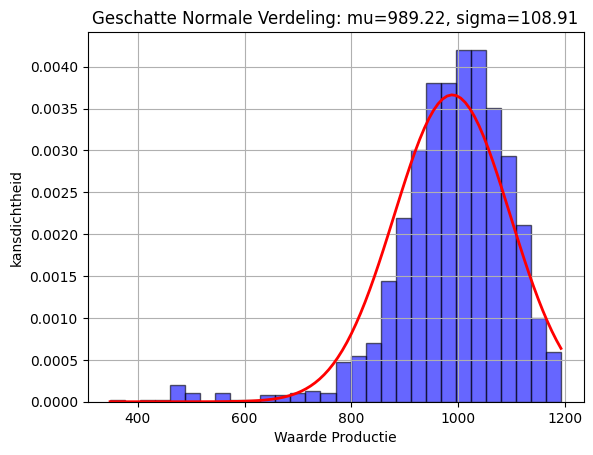

In [199]:
# fitting data voor BRU fabriek
dagelijkse_productie_BRU['production'] = dagelijkse_productie_BRU['production'].apply(pd.to_numeric)
# plotdata_BRU = dagelijkse_productie_BRU['production'].to_numpy()

plotdata_BRU_zonder_productie_df = dagelijkse_productie_BRU[dagelijkse_productie_BRU['production'] == 0]
plotdata_BRU_zonder_productie_arr = plotdata_BRU_zonder_productie_df['production'].to_numpy()
print(f"Kans op BRU productiedag zonder productie =  {len(plotdata_BRU_zonder_productie_arr) / len(dagelijkse_productie_BRU['production'])} ")

plotdata_BRU_met_productie_df = dagelijkse_productie_BRU[dagelijkse_productie_BRU['production'] != 0]
plotdata_BRU_met_productie_arr = plotdata_BRU_met_productie_df['production'].to_numpy()

mu_BRU, sigma_BRU = norm.fit(plotdata_BRU_met_productie_arr)

# Maak een histogram van de gegevens
plt.hist(plotdata_BRU_met_productie_arr, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')

# Maak een PDF (probability density function) op basis van de geschatte parameters
x = np.linspace(min(plotdata_BRU_met_productie_arr), max(plotdata_BRU_met_productie_arr), 100)
pdf_BRU = norm.pdf(x, mu_BRU, sigma_BRU)

# Plot de PDF
plt.plot(x, pdf_BRU, 'r', linewidth=2)
plt.title(f'Geschatte Normale Verdeling: mu={mu_BRU:.2f}, sigma={sigma_BRU:.2f}')
plt.xlabel('Waarde Productie')
plt.ylabel('kansdichtheid')
plt.grid(True)
plt.show()

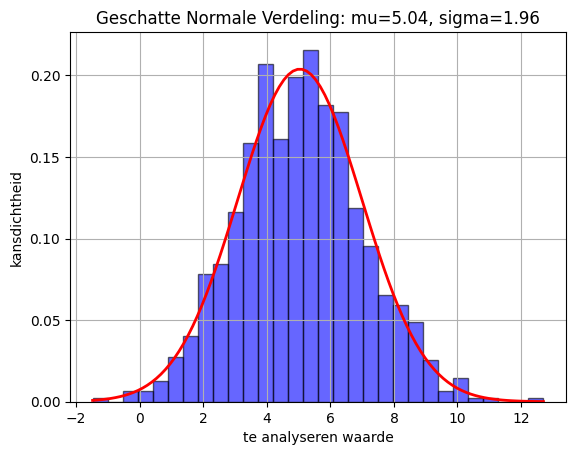

In [200]:
# voorbeeld analyse, fit data

# Genereer voorbeeldgegevens (normaal verdeeld)
np.random.seed(42)
data = np.random.normal(loc=5, scale=2, size=1000)

# Schat de parameters van de normale verdeling
mu, sigma = norm.fit(data)

# Maak een histogram van de gegevens
plt.hist(data, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')

# Maak een PDF (probability density function) op basis van de geschatte parameters
x = np.linspace(min(data), max(data), 100)
pdf = norm.pdf(x, mu, sigma)

# Plot de PDF
plt.plot(x, pdf, 'r', linewidth=2)
plt.title(f'Geschatte Normale Verdeling: mu={mu:.2f}, sigma={sigma:.2f}')
plt.xlabel('te analyseren waarde')
plt.ylabel('kansdichtheid')
plt.grid(True)
plt.show()

# G : uitvoeren van de Simulatie

In [201]:
xx = np.linspace(0, 10 ** 4)
data = sim.simulatie(7)
Fxx = sim.cumulatieve_distributie_functie(xx)
# plt.plot(xx, Fxx)